### Notebook to Build Dashboard to Pull Benchmark Prices and Spreads for Arbitrage

In [2]:
pip install spgci

  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached charset_normalizer-3.4.4-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.4-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (153 kB)
Using cached idna-3.11-py3-none-any.whl (71 kB)
Using cached tenacity-8.5.0-py3-none-any.whl (28 kB)
Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
Using cached numpy-

In [3]:
import spgci
print(spgci.__version__)

0.0.75


In [4]:
import spgci as ci

# Initialize credentials and MarketData module
ci.set_credentials(username, password, appkey)
mdd = ci.MarketData()

# Pulling current assessments for Brent and WTI symbols
symbols = df_platts = mdd.get_assessments_by_symbol_current(symbol=symbols)

NameError: name 'username' is not defined

## To create dedicated environment for CA dashboard; to run in bash
```bash
conda create -n commercialanalyst_env python=3.10
conda activate commercialanalyst_env
```

### Install ipykernel and any packages
```bash
conda install ipykernel
```

### Register the kernel with Jupyter
```bash
python -m ipykernel install --user --name commercialanalyst_env --display-name "Python (commercialanalyst_env)"
```

In [ ]:
# Install required packages from Yahoo Finance
!pip install yfinance pandas numpy matplotlib

  Using cached yfinance-1.1.0-py2.py3-none-any.whl.metadata (6.1 kB)
  Using cached multitasking-0.0.12-py3-none-any.whl
  Using cached frozendict-2.4.7-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (23 kB)
  Using cached peewee-3.19.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached websockets-16.0-cp310-cp310-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (6.8 kB)
  Using cached cffi-2.0.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.6 kB)
Using cached yfinance-1.1.0-py2.py3-none-any.whl (129 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 28.6 MB/s  0:00:00 eta 0:00:01
Using cached cffi-2.0.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (216 kB)
   ━━━━━━━━━━━━━━━

## Reading in WTI Futures (NYMEX) and Brent Futures (ICE)

In [2]:
import yfinance as yf

# WTI Futures (NYMEX)
wti_ticker = yf.Ticker("CL=F")
df_wti = wti_ticker.history(period="1y")

# Brent Futures (ICE)
brent_ticker = yf.Ticker("BZ=F")
df_brent = brent_ticker.history(period="1y")

In [ ]:
df_wti.head()

(                                Open       High        Low      Close  Volume  \
 Date                                                                            
 2025-02-03 00:00:00-05:00  74.139999  75.180000  72.050003  73.160004  517853   
 2025-02-04 00:00:00-05:00  72.349998  73.349998  70.669998  72.699997  452961   
 2025-02-05 00:00:00-05:00  72.760002  72.970001  70.959999  71.029999  289902   
 2025-02-06 00:00:00-05:00  71.180000  71.849998  70.430000  70.610001  299037   
 2025-02-07 00:00:00-05:00  70.559998  71.410004  70.470001  71.000000  273766   
 
                            Dividends  Stock Splits  
 Date                                                
 2025-02-03 00:00:00-05:00        0.0           0.0  
 2025-02-04 00:00:00-05:00        0.0           0.0  
 2025-02-05 00:00:00-05:00        0.0           0.0  
 2025-02-06 00:00:00-05:00        0.0           0.0  
 2025-02-07 00:00:00-05:00        0.0           0.0  ,
                                 Open       H

In [5]:
df_brent.head()  

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-03 00:00:00-05:00,76.820000,77.529999,75.040001,75.959999,75087,0.0,0.0
2025-02-04 00:00:00-05:00,75.519997,76.669998,74.129997,76.199997,62716,0.0,0.0
2025-02-05 00:00:00-05:00,76.080002,76.349998,74.550003,74.610001,30739,0.0,0.0
2025-02-06 00:00:00-05:00,74.599998,75.389999,74.089996,74.290001,41460,0.0,0.0
2025-02-07 00:00:00-05:00,74.199997,75.089996,74.190002,74.660004,35634,0.0,0.0


## WTI vs Brent over 24-Month Period

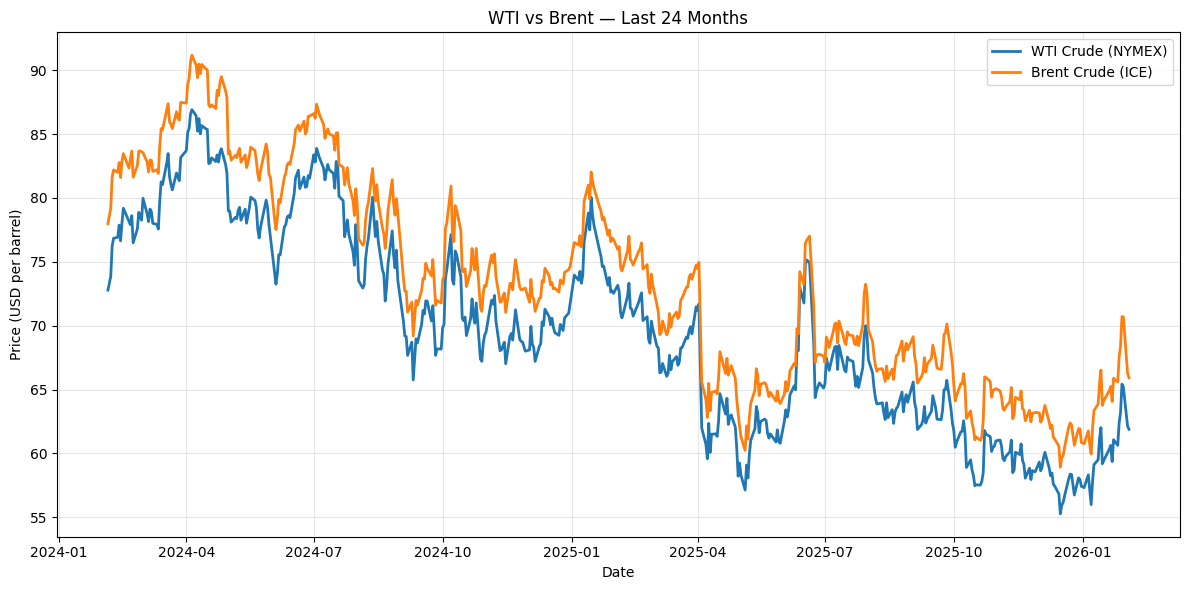

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
wti = yf.Ticker("CL=F").history(period="24mo")
brent = yf.Ticker("BZ=F").history(period="24mo")

# --- Keep only the settlement/close prices ---
wti = wti["Close"].rename("WTI")
brent = brent["Close"].rename("Brent")

# --- Align dates ---
df = (
    wti.to_frame()
    .join(brent.to_frame(), how="inner")
)

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["WTI"], label="WTI Crude (NYMEX)", linewidth=2)
plt.plot(df.index, df["Brent"], label="Brent Crude (ICE)", linewidth=2)

plt.title("WTI vs Brent — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## JKM Futures (CME)

In [8]:
# JKM Futures (CME)
jkm_ticker = yf.Ticker("JKM=F")
df_jkm = jkm_ticker.history(period="1y")

In [9]:
df_jkm.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-03 00:00:00-05:00,14.405,14.405,14.405,14.405,0,0.0,0.0
2025-02-04 00:00:00-05:00,14.495,14.495,14.495,14.495,0,0.0,0.0
2025-02-05 00:00:00-05:00,14.430,14.430,14.430,14.430,0,0.0,0.0
2025-02-06 00:00:00-05:00,14.515,14.515,14.515,14.515,0,0.0,0.0
2025-02-07 00:00:00-05:00,14.725,14.725,14.725,14.725,0,0.0,0.0


# TTF Futures   

In [10]:
# TTF Futures (CME)
ttf_ticker = yf.Ticker("TTF=F")
df_ttf = ttf_ticker.history(period="1y")    

In [12]:
df_ttf.head()   

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-03 00:00:00-05:00,54.200001,54.619999,52.849998,53.793999,539,0.0,0.0
2025-02-04 00:00:00-05:00,52.904999,53.395000,51.389999,52.048000,1696,0.0,0.0
2025-02-05 00:00:00-05:00,51.849998,53.904999,51.849998,53.438000,8886,0.0,0.0
2025-02-06 00:00:00-05:00,53.910000,55.465000,53.549999,54.501999,37213,0.0,0.0
2025-02-07 00:00:00-05:00,53.814999,56.049999,53.660000,55.723000,24713,0.0,0.0


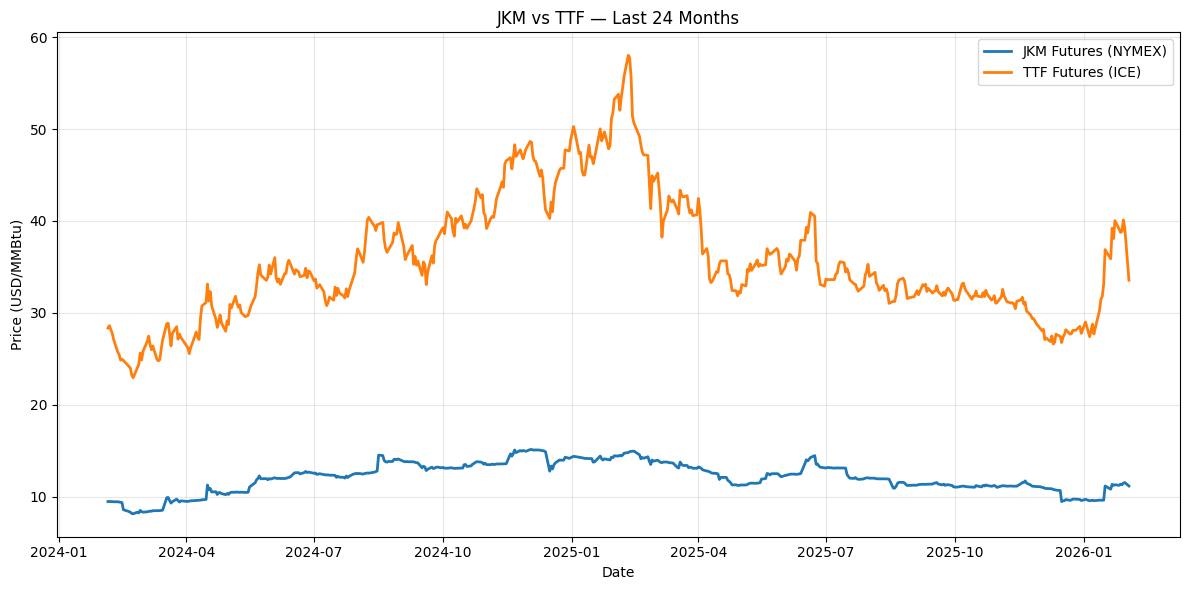

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

# --- Fetch 24 months of data ---
jkm = yf.Ticker("JKM=F").history(period="24mo")
ttf = yf.Ticker("TTF=F").history(period="24mo")

# --- Keep only the settlement/close prices ---
jkm = jkm["Close"]
ttf = ttf["Close"]

# --- Align dates ---
df = (
    jkm.rename("JKM")
    .to_frame()
    .join(ttf.rename("TTF"), how="inner")
)

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["JKM"], label="JKM Futures (NYMEX)", linewidth=2)
plt.plot(df.index, df["TTF"], label="TTF Futures (ICE)", linewidth=2)

plt.title("JKM vs TTF — Last 24 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD/MMBtu)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()